<a href="https://colab.research.google.com/github/Sergey-Kiselev-dev/ML_sem_pub/blob/main/ML_job_Izing_02b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ising model
===========
The Ising Hamiltonian can be written as,

H=−J∑⟨ij⟩SiSj.

The spins  Si
  can take values  ±1
 ,
⟨ij⟩
  implies nearest-neighbor interaction only,
J>0
  is the strength of exchange interaction.
The system undergoes a 2nd order phase transition at the critical temperature  Tc
 . For temperatures less than  Tc
 , the system magnetizes, and the state is called the ferromagnetic or the ordered state. This amounts to a globally ordered state due to the presence of local interactions between the spin. For temperatures greater than  Tc
 , the system is in the disordered or the paramagnetic state. In this case, there are no long-range correlations between the spins.

The order parameter

m=⟨S⟩N,

for this system is the average magnetization. The order parameter distinguishes the two phases realized by the systems. It is zero in the disordered state, while non-zero in the ordered, ferromagnetic, state.

The one dimensional (1D) Ising model does not exhibit the phenomenon of phase transition while higher dimensions do. This can be argued based on arguments, due to Peierls, related to the net change in free energy,  F=E−TS
 . Here  E
  and  S
  are, respectively, the energy and entropy of the system. We estimate the net change in free energy for introducing a disorder in an otherwise ordered system. The ordered state can only be stable if the net change in free energy is positive,  ΔF>0
 , for any non-zero temperature.

1D Ising model:
-------
Introducing a domain wall (defect) in an ordered state increases the energy by  4J
 , while the entropy change is  kBlnN
 , due to  N
  choices to introduce the domain. So net change in the free energy,  ΔF=4J−kBTlnN
 , is always negative for  N→∞
 . Thus, the system prefers a disordered state. So, there is no spontaneous symmetry breaking in 1D for an infinite Ising chain. This argument can be generalized for any domain of length  L
  and higher dimensions.

2D Ising model:
-------------
For two and higher dimensions, we can introduce islands of defects, which cost only at the boundaries, and are thus, proportional to the perimeter  L=εN2
 , where  0<ε<1
 . In 2D, the number of islands scale as  3εN2
 , while  ΔE=ε4JN2
 .  ΔF
  is then  ε4JN2−kBTln(N23εN2)
 . This gives a rough estimate of the critical temperature  Tc∼J/kB
 .

Monte-Carlo simulation of 2D Ising model
==============
The following code simulates the Ising model in 2D using the Metropolis algorithm. The main steps of Metropolis algorithm are:

1. Prepare an initial configuration of N spins
2. Flip the spin of a randomly chosen lattice site.
3. Calculate the change in energy dE.
4. If dE < 0, accept the move. Otherwise accept the move with probability exp^{-dE/T}. This satisfies the detailed balance condition, ensuring a final equilibrium state.
5. Repeat 2-4.

In the code below, we have estimated and plotted energy, magnetization, specific heat and susceptibility of the system.

In [ ]:
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [ ]:
#----------------------------------------------------------------------
##  BLOCK OF FUNCTIONS USED IN THE MAIN CODE
#----------------------------------------------------------------------
def initialstate(N):
    ''' generates a random spin configuration for initial condition'''
    state = 2*np.random.randint(2, size=(N,N))-1
    return state


def mcmove(config, beta):
    '''Monte Carlo move using Metropolis algorithm '''
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config


def calcEnergy(config):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/4.


def calcMag(config):
    '''Magnetization of a given configuration'''
    mag = np.sum(config)
    return mag

In [ ]:
## change these parameters for a smaller (faster) simulation
nt      = 88         #  number of temperature points
N       = 16         #  size of the lattice, N x N
eqSteps = 1024       #  number of MC sweeps for equilibration
mcSteps = 1024       #  number of MC sweeps for calculation

T       = np.linspace(1.53, 3.28, nt);
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N)
# divide by number of samples, and by system size to get intensive values

In [ ]:
#----------------------------------------------------------------------
#  MAIN PART OF THE CODE
#----------------------------------------------------------------------
for tt in range(nt):
    E1 = M1 = E2 = M2 = 0
    config = initialstate(N)
    iT=1.0/T[tt]; iT2=iT*iT;

    for i in range(eqSteps):         # equilibrate
        mcmove(config, iT)           # Monte Carlo moves

    for i in range(mcSteps):
        mcmove(config, iT)
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag
        E2 = E2 + Ene*Ene

    E[tt] = n1*E1
    M[tt] = n1*M1
    C[tt] = (n1*E2 - n2*E1*E1)*iT2
    X[tt] = (n1*M2 - n2*M1*M1)*iT

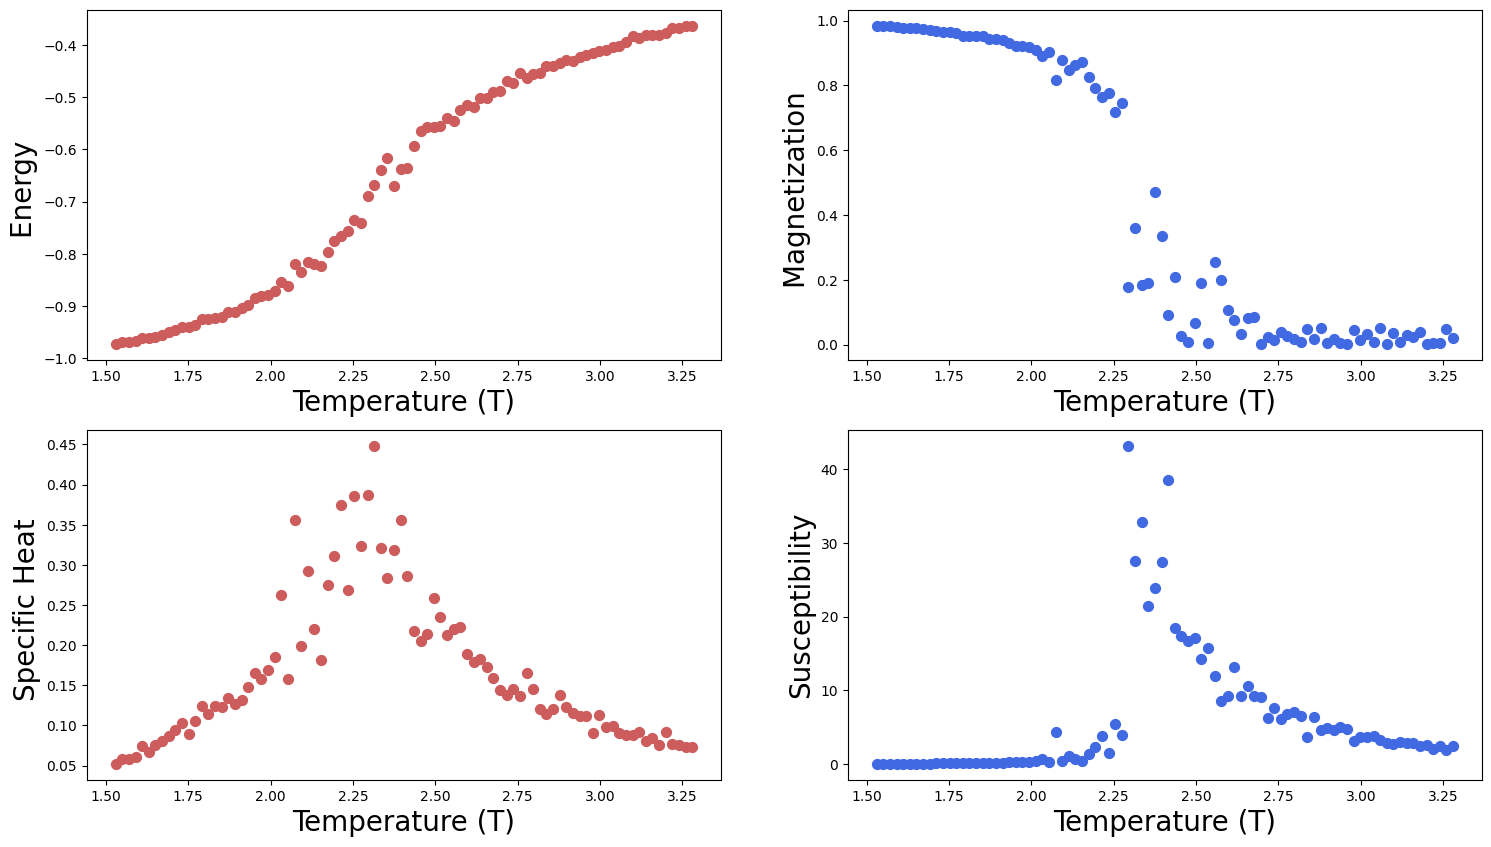

In [ ]:
f = plt.figure(figsize=(18, 10)); # plot the calculated values

sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');